In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# makes plots pretty
%config InlineBackend.figure_format = 'retina'

In [2]:
def charge_sequence_from_aa_chars(aa_char_sequence, aa2charge):
    """Helper function to convert AA residue sequence to charge sequence"""
    return [aa2charge[x] for x in aa_char_sequence]

def volume_sequence_from_aa_chars(aa_char_sequence, aa2volume):
    """Helper function to convert AA residue sequence to volume sequence"""
    return [aa2volume[x] for x in aa_char_sequence]

def zero_pad_sequence(sequence, pore_length_in_aa):
    """
    Zero pad charge, volume, or residue sequence with zeros of pore length.
    This helps with calculating the insertion and removal of the protein from
    the pore
    """
    return [0]*pore_length_in_aa + sequence + [0]*pore_length_in_aa

def get_charge_in_pore_vs_aa_idx(aa_char_sequence, aa2charge, pore_length_in_aa):
    """
    Calculates the charge in the nanopore vs amino acid index. We're assuming that
    the protein moves through as an unfolded rigid rod and as a fixed charged 
    described by the aa2charge mapping and that the pore is of length
    pore_length_in_aa where the pore length is in amino-acid spacing units of
    roughtly 0.33 nm. That means that a 10nm pore would have up to 33 amino acids
    inside.
    
    As an illustrative example, imagine 1 nm nanopore that (in this simplistic model)
    fits just three amino acids as shown below and that the molecule is moving from
    left to right.

        |          |
        |          |
        |----------|
  
     0   0  -1   0   1   0
     M   A   E   P   R   Q

        |----------|
        |          |
        |          |
        
    The total charge inside the pore is -1. Because the fifth amino acid 'A' has just 
    entered this model would output a charge of -1 at index 5.
    """
    
    charge_sequence = charge_sequence_from_aa_chars(aa_char_sequence, aa2charge)
    padded_charge_sequence = zero_pad_sequence(charge_sequence, pore_length_in_aa)
    
    charge_in_pore_vs_idx = []
    for aa_idx in range(0, len(padded_charge_sequence) - pore_length_in_aa):
        charge_in_pore = sum(padded_charge_sequence[aa_idx: aa_idx+pore_length_in_aa])
        charge_in_pore_vs_idx.append(charge_in_pore)
    return charge_in_pore_vs_idx

def get_volume_in_pore_vs_aa_idx(aa_char_sequence, aa2volume, pore_length_in_aa):
    """
    Calculates the charge in the nanopore vs amino acid index. Identical
    to get_charge_in_pore_vs_aa_idx but replaces aa2charge with aa2volume.
    """
    volume_sequence = volume_sequence_from_aa_chars(aa_char_sequence, aa2volume)
    padded_volume_sequence = zero_pad_sequence(volume_sequence, pore_length_in_aa)
    
    volume_in_pore_vs_idx = []
    for aa_idx in range(0, len(padded_volume_sequence) - pore_length_in_aa):
        volume_in_pore = sum(padded_volume_sequence[aa_idx: aa_idx+pore_length_in_aa])
        volume_in_pore_vs_idx.append(volume_in_pore)
    return volume_in_pore_vs_idx


In [3]:
#loading the data and taking a peek to see if it looks good, which it does

DATA_FILE = 'Alpha_Tubulin_GST_Charge_n_2021-07-24.csv'
data_table = pd.read_csv(f'../data_raw/{DATA_FILE}')

In [4]:
data_table

,Position,Unnamed: 1,Residue,Charge,MW,Volume
0,1,NaN,M,0.000,149.21,0.180843
1,2,NaN,R,1.000,174.20,0.211130
2,3,NaN,E,-0.997,147.13,0.178322
3,4,NaN,C,-0.050,121.16,0.146846
4,5,NaN,I,0.000,131.18,0.158990
5,6,NaN,S,0.000,105.09,0.127369
6,7,NaN,I,0.000,131.18,0.158990
7,8,NaN,H,0.107,155.16,0.188054
8,9,NaN,V,0.000,117.15,0.141986
9,10,NaN,G,0.000,75.07,0.090985


In [5]:
#extract amino acid residue sequence, charge sequence, and volume sequence
sequence = data_table['Residue']
charge_sequence = data_table['Charge']
volume_sequence = data_table['Volume']

In [6]:
#build aa2charge and aa2volume mapping

#this builds the mapping while checking to see if any copies of the amino acid have different charges
aa2charge = {}#{str(aa).strip("'"):charge for aa, charge in zip(sequence, charge_sequence)}
for idx, (aa, charge) in enumerate(zip(sequence, charge_sequence)):
    pretty_aa = str(aa).strip("'")
    if pretty_aa in aa2charge.keys():
        previous_charge = aa2charge[pretty_aa]
        if previous_charge != charge:
            print('At least one amino acid has more than one charge value in the sequence')
            print(f'Problem with at index {idx} amino acid {aa} with charge {charge}')
    else:
        aa2charge[pretty_aa] = charge

aa2volume = {aa:volume for aa, volume in zip(sequence, volume_sequence)}

In [7]:
PORE_LENGTH_IN_NM = 28
pore_length_in_aa = int(np.round(PORE_LENGTH_IN_NM/0.33))

print(f"Pore length is {PORE_LENGTH_IN_NM} nm which is {pore_length_in_aa} amino acids")

Pore length is 28 nm which is 85 amino acids


In [8]:
aa2charge

{'M': 0.0,
 'R': 1.0,
 'E': -0.997,
 'C': -0.05,
 'I': 0.0,
 'S': 0.0,
 'H': 0.107,
 'V': 0.0,
 'G': 0.0,
 'Q': 0.0,
 'A': 0.0,
 'N': 0.0,
 'W': 0.0,
 'L': 0.0,
 'Y': -0.001,
 'P': 0.0,
 'D': -0.9990000000000001,
 'K': 0.998,
 'T': 0.0,
 'F': 0.0}

In [9]:
print(f'Total net charge is {sum(charge_sequence)}')
print(f'Total net charge for the first 85 amino acids is {sum(charge_sequence[0:84])}')

Total net charge is -25.67599999999999
Total net charge for the first 85 amino acids is -5.811000000000001


In [10]:
charge_in_pore_vs_aa = get_charge_in_pore_vs_aa_idx(sequence, aa2charge, pore_length_in_aa)
volume_in_pore_va_aa = get_volume_in_pore_vs_aa_idx(sequence, aa2volume, pore_length_in_aa)

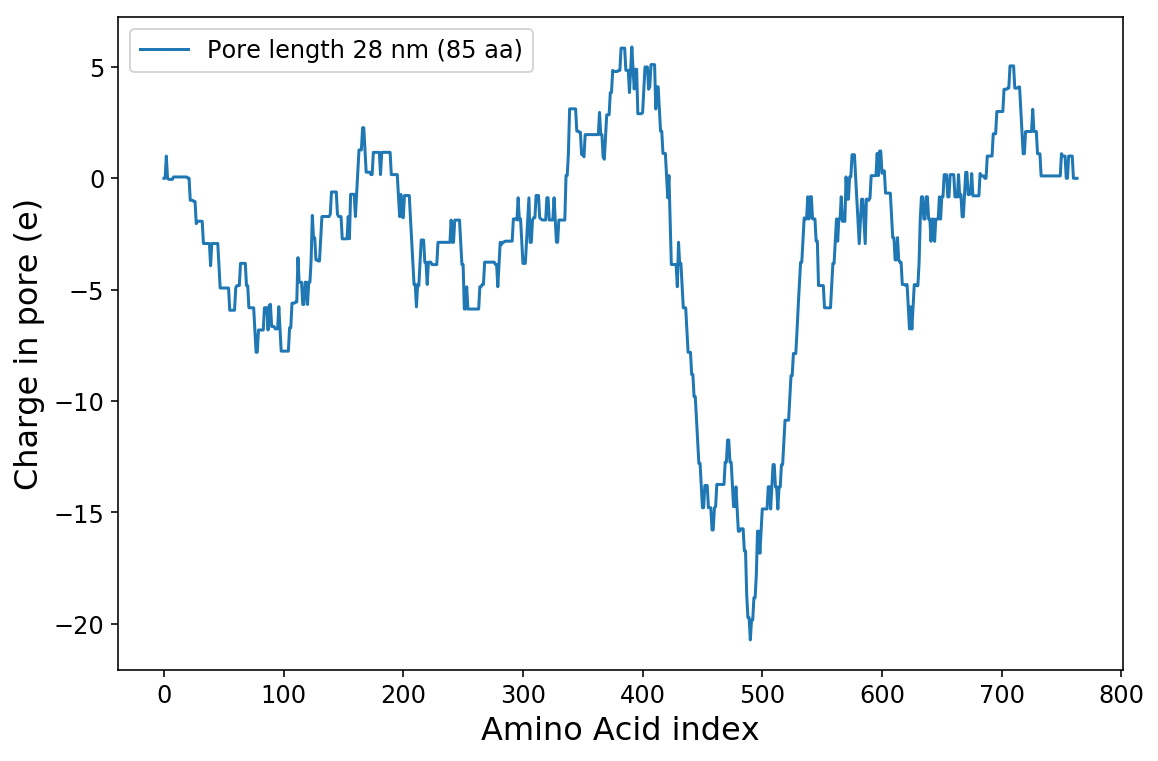

In [11]:
plt.figure(figsize=(9,6))
plt.plot(charge_in_pore_vs_aa, label=f'Pore length {PORE_LENGTH_IN_NM} nm ({pore_length_in_aa} aa)')
plt.xlabel('Amino Acid index', fontsize=16)
plt.ylabel('Charge in pore (e)', fontsize=16)
# plt.annotate('Potential well centered at AA 167', xy=(167, 0),  xycoords='data',
#             xytext=(10, -10), textcoords='offset points',
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             horizontalalignment='left', verticalalignment='top',
#             fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

Next we'll create a plot that's propotional to the potential landscape in the pore. First, note that

$F(z) = -\frac{\partial U(z)}{\partial z}$

Thus we can write

$\int_0^z F(z) dz = -U(z)$

and using our relationship between electric field and force, we have $F(z) = q(z)E(z)$. Typically we assume a spatially varying field for a constant charge, but here we can think of this as a spatially varying charge passing through a constant field yielding $F(z) = q(z)E$.

Thus we have

$\int_0^z q(z)E dz = -U(z)$

$\int_0^z q(z) dz = -U(z)/E$


$\int_0^z q(z) dz = -U(z)/E$

We can write the electic field in terms of the applied voltage and effective pore length $E = \frac{V}{H_eff}$. Thus we have

$\int_0^z q(z) dz = -U(z)H_{eff}/V$

Because we are calculating this using discrete steps, the calcuation I've done here can more appropriately be written as

$\sum_i^j q_i \Delta z = -U_j/E = -U_j H_{eff} / V$

We'll call the quantity on the left the _cumulative charge distance_ and note that it's the potential divided by the electric field created by the drop in potential across the pore. Note that $\Delta z$ is a constant step size along the molecule of size 0.33 nm. IF we multiply this quantity by $\frac{V}{H_{eff}}$ we have the potential energy landscape for translocation. 

Roughly speaking from Kramers transition state theory, we should see an exponential dependence on the trap height and translocation time.

In [12]:
cumulative_charge_distance = np.cumsum(charge_in_pore_vs_aa)

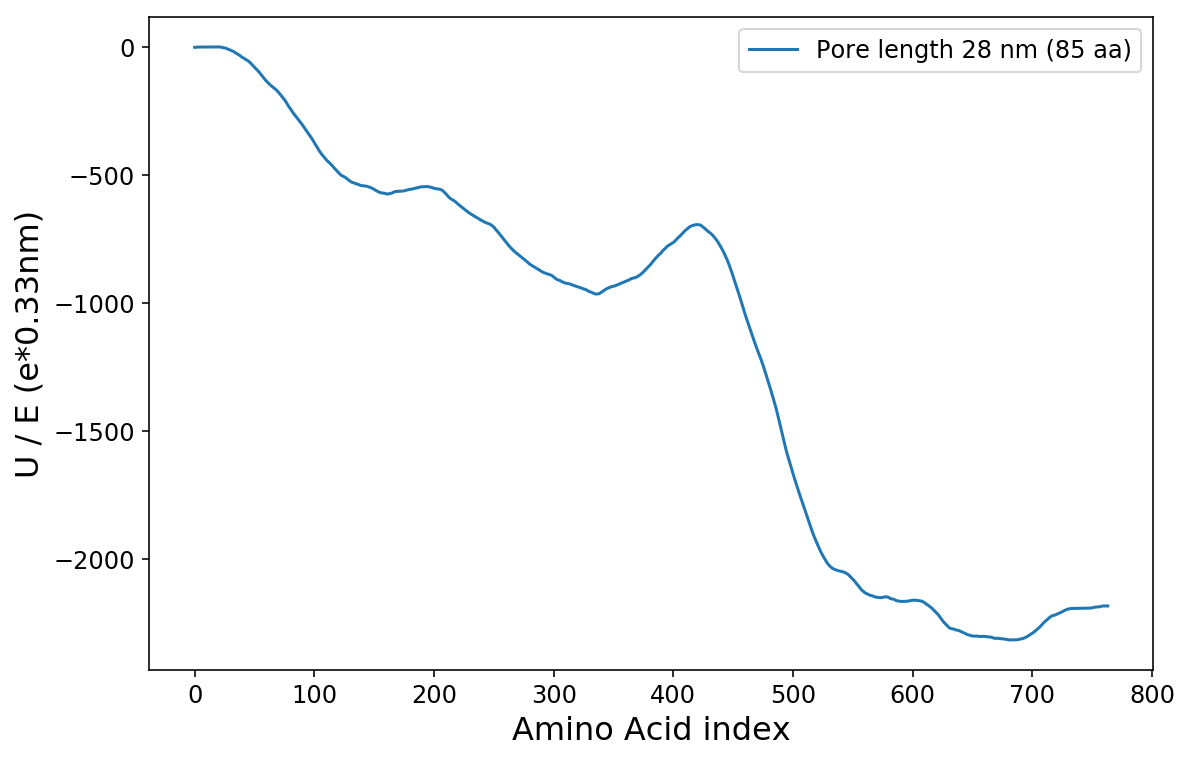

In [13]:
plt.figure(figsize=(9,6))
plt.plot(cumulative_charge_distance, label=f'Pore length {PORE_LENGTH_IN_NM} nm ({pore_length_in_aa} aa)')
plt.xlabel('Amino Acid index', fontsize=16)
plt.ylabel('U / E (e*0.33nm)', fontsize=16)
# plt.annotate('Potential well centered at AA 167', xy=(167, -1550),  xycoords='data',
#             xytext=(30, 0), textcoords='offset points',
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             horizontalalignment='left', verticalalignment='center',
#             fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

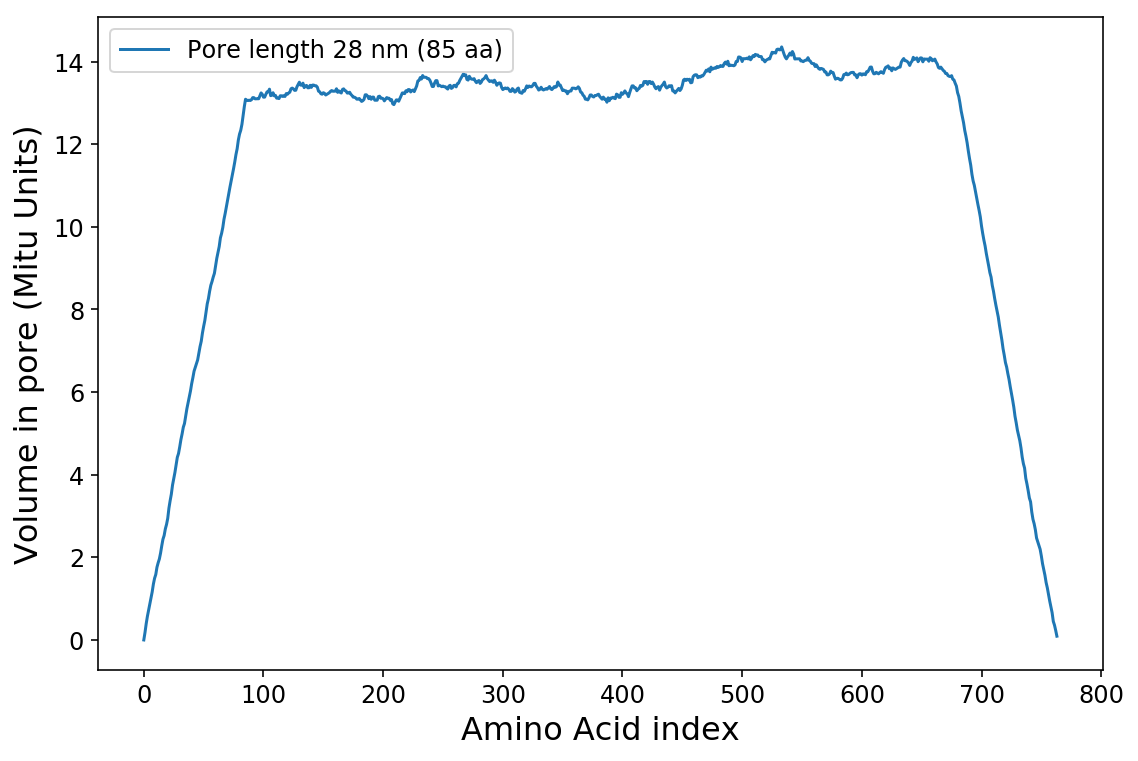

In [14]:
plt.figure(figsize=(9,6))
plt.plot(volume_in_pore_va_aa, label=f'Pore length {PORE_LENGTH_IN_NM} nm ({pore_length_in_aa} aa)')
plt.xlabel('Amino Acid index', fontsize=16)
plt.ylabel('Volume in pore (Mitu Units)', fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [15]:
#output data to csv
#first column is aa_index. Note that it's longer than the original sequence by the lengh of the pore in amino acids.
#This is done becaue we're stepping the pore through the pore on the way out and are keeping track of the partially filled
#pore until it's totally outside the pore.

output_df = pd.DataFrame.from_dict(
    {'aa_index': range(1, len(charge_in_pore_vs_aa)+1),
     'charge_in_pore': charge_in_pore_vs_aa,
     'volume_in_pore': volume_in_pore_va_aa,
     'cumulative_charge_distance': cumulative_charge_distance})


In [16]:
output_df.to_csv(f'..\data_processed\charge_and_volume_vs_aa_index_in_pore_{DATA_FILE}')